In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from pprint import pprint

In [19]:
df = pd.read_json("cars_info.json")
df = df.dropna()
df.head(2)

,Prix,year,origin,firstCirculationDate,firstHand,mileage,energy,gearbox,externalColor,doors,ratedHorsePower,powerDIN,critAir,co2,owners
1,43570.0,2022.0,Importé,07/01/2023,Non,20 478 km,Diesel,Automatique,gris metal,4.0,10 CV,(DIN) 190 ch,2,132 g/km,2.0
2,26860.0,2019.0,France,30/09/2019,Non,97 988 km,Diesel,Manuelle,blanc,4.0,5 CV,(DIN) 125 ch,2,159 g/km,2.0


In [20]:
# Prétraitement
df['Prix'] = df['Prix'].astype(int)
df['year'] = df['year'].astype(int)
df['origin'] = df['origin'].replace({'Importé': 1, 'France': 0})
df['firstHand'] = df['firstHand'].replace({'Oui': 1, 'Non': 0})
df['mileage'] = df['mileage'].str.extract('(\d+)').astype(int) 
df['gearbox'] = df['gearbox'].replace({'Automatique': 1, 'Manuelle': 0})
df['ratedHorsePower'] = df['ratedHorsePower'].str.extract('(\d+)').astype(int)
df['powerDIN'] = df['powerDIN'].str.extract('(\d+)').astype(int)
df['doors'] = df['doors'].astype(int)
df['co2'] = df['co2'].str.extract('(\d+)').astype(int) 
df['critAir'] = df['critAir'].str.extract('(\d+)').astype(int) 
df['energy'] = df['energy'].replace({'Diesel' : 0,'Essence' : 1,'Hybride essence électrique' : 2,'Electrique' : 3,'Bicarburation essence bioéthanol' : 4,'Hybride diesel électrique' : 5})
df = df.drop(["firstCirculationDate", "externalColor"], axis=1)

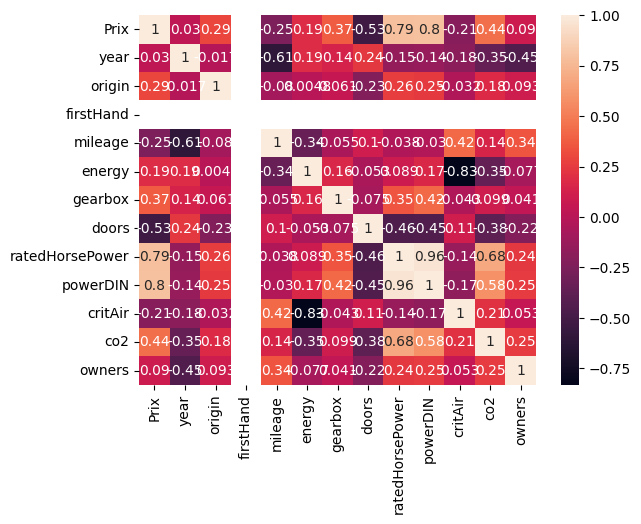

In [21]:
# Matrice de corrélation
import seaborn as sns
import matplotlib.pyplot as plt

correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [24]:
df.describe()


,Prix,year,origin,firstHand,mileage,energy,gearbox,doors,ratedHorsePower,powerDIN,critAir,co2,owners
count,504.000000,504.000000,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,41103.710317,2019.126984,0.027778,0.0,75.369048,0.761905,0.611111,4.597222,11.142857,188.144841,1.392857,131.603175,2.166667
std,42103.646961,3.352063,0.164499,0.0,49.407692,0.833480,0.487982,0.923771,10.316436,118.907857,0.567885,56.791248,0.864589
min,7520.000000,1980.000000,0.000000,0.0,1.000000,0.000000,0.000000,2.000000,1.000000,39.000000,0.000000,0.000000,1.000000
25%,19590.000000,2018.000000,0.000000,0.0,37.000000,0.000000,0.000000,5.000000,6.000000,116.000000,1.000000,109.000000,2.000000
50%,27480.000000,2020.000000,0.000000,0.0,68.000000,1.000000,1.000000,5.000000,7.000000,140.000000,1.000000,125.500000,2.000000
75%,42532.500000,2021.000000,0.000000,0.0,106.000000,1.000000,1.000000,5.000000,11.000000,208.750000,2.000000,146.250000,3.000000
max,346200.000000,2024.000000,1.000000,0.0,309.000000,5.000000,1.000000,5.000000,70.000000,710.000000,3.000000,395.000000,6.000000


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

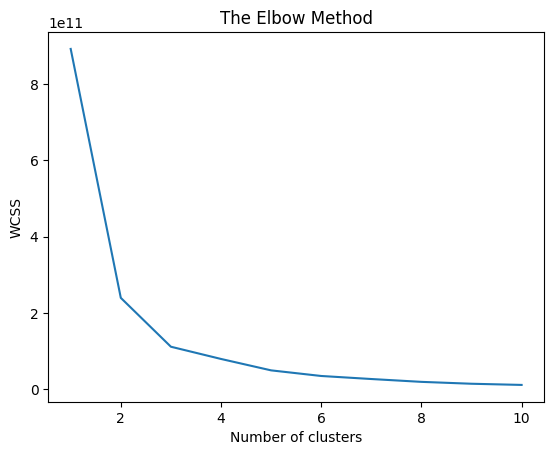

In [25]:
# Détermination du nombre de cluster
wcss=[]

for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
X = df
y = df.energy	
X.shape, y.shape 

((504, 13), (504,))

In [40]:
km = KMeans(n_clusters=3, random_state=42)
km
km.fit(X)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.